<a href="https://colab.research.google.com/github/ranjankumar22062/Machine-learning-project/blob/main/gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection

In [2]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


# New Section

In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#number of rows and column
gold_data.shape

(2290, 6)

In [6]:
#getting somebasics information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [8]:
#getting the statistical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

In [12]:
correlation = gold_data.corr()

<Axes: >

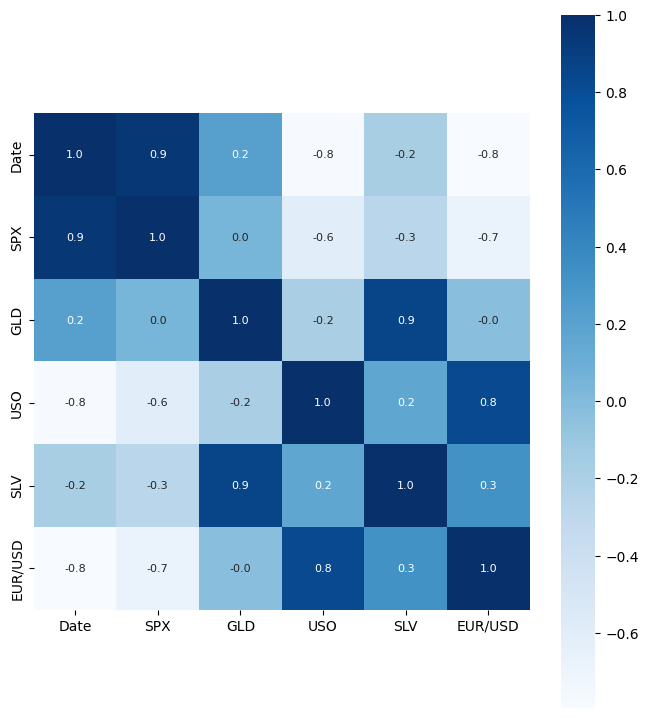

In [13]:
plt.figure(figsize=(8,9))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')


In [14]:
#correlation vale of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-17-5fdca0ba4a13>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

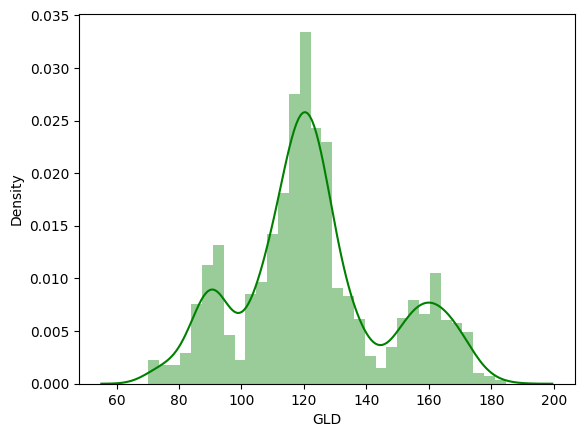

In [17]:
#check the distribution
sns.distplot(gold_data['GLD'],color='green')

In [18]:
#splitin the feature and tG])
X= gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [19]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
#model training
regressor = RandomForestRegressor(n_estimators=100)


In [23]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [24]:
test_data_prediction = regressor.predict(X_test)


In [25]:
print(test_data_prediction)

[168.2536989   81.85150016 116.21780011 127.56900088 120.62640082
 154.72179729 150.6913987  126.01330025 117.36639895 126.01290092
 116.80640059 171.64350095 141.14069831 167.8479986  115.15190001
 117.73550055 138.2644034  170.0615005  159.39080343 157.90519914
 155.13100027 125.29549967 176.18969979 157.36700318 125.17270043
  93.64869994  77.3014     120.49550009 119.10379917 167.44089936
  88.1913004  125.59550005  91.07440048 117.68390041 121.21069908
 136.17280155 115.37550136 114.8160008  145.83149961 107.12900066
 104.03260239  87.19259777 126.53350071 117.96089953 154.35739886
 119.66649997 108.29750004 108.10049841  93.15860025 127.07399794
  75.23870028 113.66279935 121.45680036 111.1752992  118.86229897
 120.58989971 159.82230156 167.26330127 146.93189697  86.05249882
  94.33620042  86.76759893  90.57270009 118.80260105 126.45850087
 127.51799965 169.50879981 122.2512993  117.12089908  98.74510018
 168.60100205 143.01299858 131.93720238 121.11660241 120.48709927
 119.76330

In [26]:
#R squarred error
error_score =metrics.r2_score(Y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.990110748187694


In [27]:
 Y_test = list(Y_test)

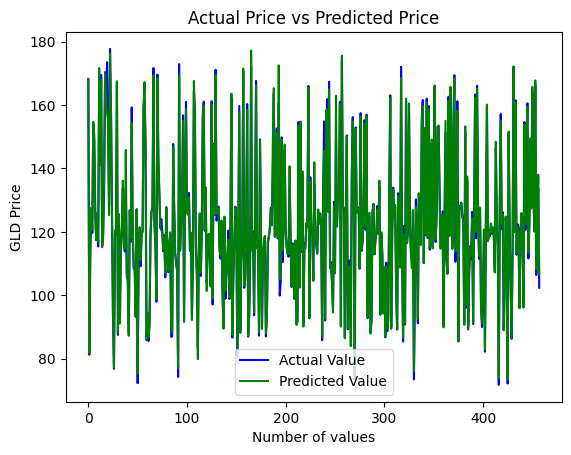

In [29]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()